# Project: Ridesharing Data Statistical Analysis (Zuber)

## Objective
To analyze taxi and competitor ride data in **Chicago** to identify passenger usage patterns, examine **neighborhood destination preferences**, and test the **impact of external factors (weather)** on trip duration for the new ridesharing company Zuber.

## Scope of Analysis

### 1. Exploratory Data Analysis (EDA)
* Analyze and visualize **ride volume** by taxi company.
* Identify and chart the **top 10 neighborhoods** in Chicago by trip destination volume.

### 2. Hypothesis Testing
* Test whether the **average duration of rides** between the **Loop and O'Hare Airport** is affected by **rainy Saturdays**.
* Formulate null and alternative hypotheses and select the appropriate statistical criterion.

## Methodology
The project involves data preprocessing (type checking, value handling), visualizations (bar charts), and statistical hypothesis testing (Student's t-test).

## Evaluation Criteria (Focus)
The project will be evaluated based on the correct data retrieval and grouping, the **clear hypothesis formulation**, the **justification of the chosen statistical test**, and the robustness of the conclusions.

# 1. Exploratory Data Analysis (EDA)

# 1.1 Import libraries and files

In [6]:
import pandas as pd
import matplotlib.pyplot as plt  
from scipy import stats

In [7]:
df_trips = pd.read_csv('datasets/moved_project_sql_result_01.csv')
df_destinations = pd.read_csv('datasets/moved_project_sql_result_04.csv')

# 1.2 Initial Data Exploration

In [8]:
# View the first 5 rows of the DataFrame
print(df_trips.head())
print(df_destinations.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


# 1.3 Verify Data Types

No conversion is necessary

df_trips:
company_name: object — OK
trips_amount: int64 — OK

df_destinations:
dropoff_location_name: object — OK
average_trips: float64 — OK

# 1.4 Identify the top 10 neighborhoods in terms of destinations

In [9]:
# Sort the neighborhoods by average trips (from highest to lowest)
top10_destinations = df_destinations.sort_values(by="average_trips", ascending=False).head(10)


In [10]:
# Display the top 10 neighborhoods
print("Top 10 neighborhoods as a destination (in average trips):")
print(top10_destinations)

Top 10 neighborhoods as a destination (in average trips):
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# 1.5 Visualize Trip Volume: Companies and Top 10 Destinations Chart

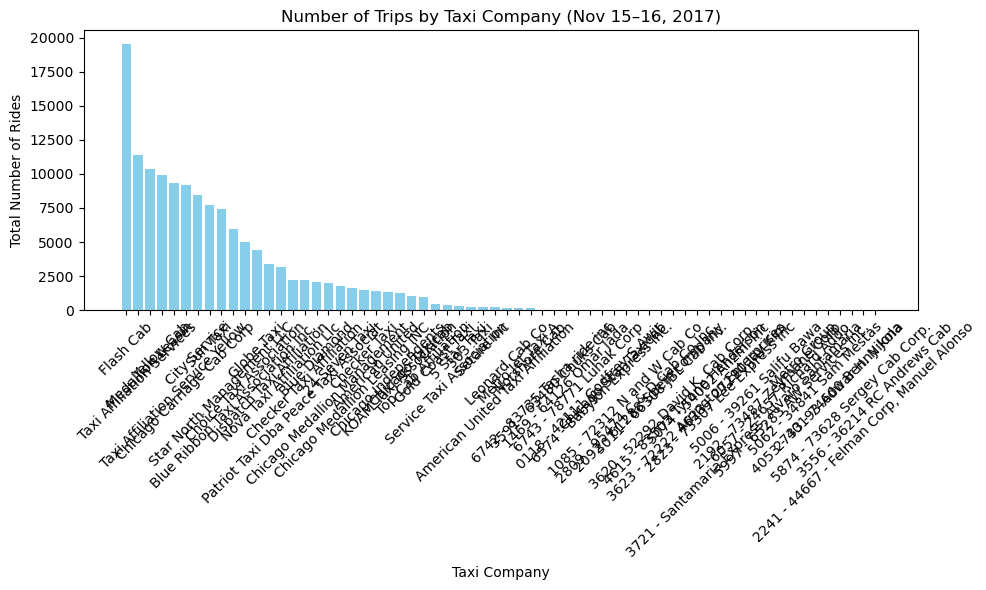

In [11]:
# Bar chart with taxi companies and their trips
plt.figure(figsize=(10, 6))
plt.bar(df_trips['company_name'], df_trips['trips_amount'], color='skyblue')
plt.title('Number of Trips by Taxi Company (Nov 15–16, 2017)')
plt.xlabel('Taxi Company')
plt.ylabel('Total Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


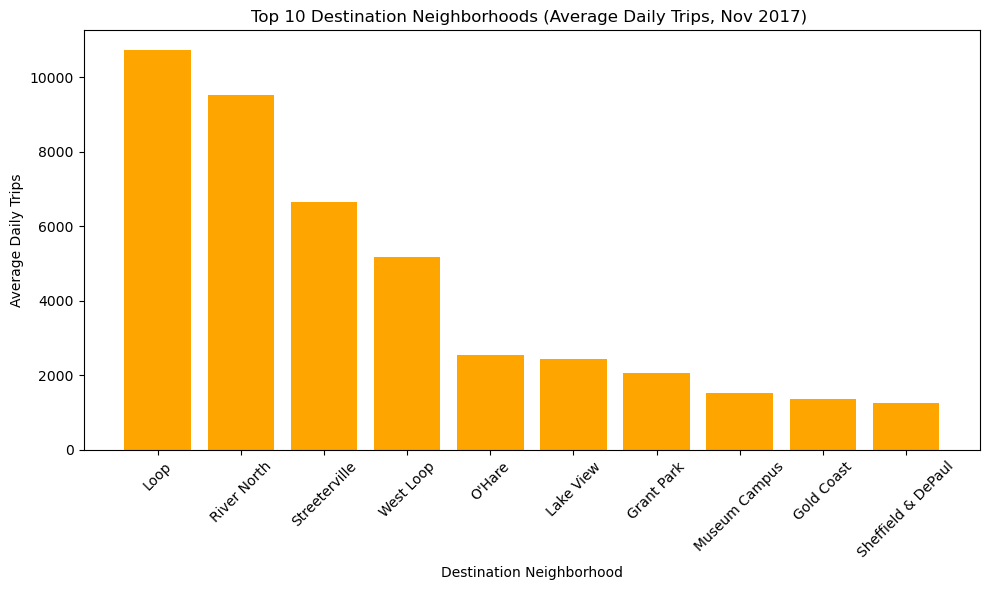

In [12]:
## Bar Chart: Top 10 Destination Neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(top10_destinations['dropoff_location_name'], top10_destinations['average_trips'], color='orange')
plt.title('Top 10 Destination Neighborhoods (Average Daily Trips, Nov 2017) ')
plt.xlabel('Destination Neighborhood')
plt.ylabel('Average Daily Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1.6 Conclusions

The analysis of the two charts shows that between November 15 and 16, 2017, Flash Cab was responsible for the highest number of trips in Chicago, with a significant difference compared to other companies, which may indicate greater coverage in the city or passenger preference. Regarding destinations, we observe that neighborhoods like Loop, River North, and Streeterville received the most trips on average during the month of November. This suggests that these regions concentrate intense activities, such as commercial, tourist areas, or areas with a high daily flow of people.

# 2.  Testing Hypotheses

# 2.1 Import file

In [13]:
df_weather_trips = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/project_sql_result_07.csv'

# 2.2 Data Overview for Hypothesis Test

In [ ]:
print(df_weather_trips.head())

# 2.3 Verify Data Types

start_ts: datetime64[ns] → already correctly converted.

weather_conditions: object with 'Good' and 'Bad' values.

duration_seconds: float64 — appropriate for mean calculations and statistical tests. Possible invalid data: there is at least one trip with a duration equal to 0 seconds, which is likely an error.

In [ ]:
df_weather_trips['duration_seconds'].describe()

In [ ]:
# # View rows with duration 0
df_weather_trips[df_weather_trips['duration_seconds'] == 0]

In [ ]:
# # Remove rows with duration 0
df_weather_trips = df_weather_trips[df_weather_trips['duration_seconds'] != 0]

In [ ]:
print((df_weather_trips['duration_seconds'] == 0).sum())

# 2.4 Hypothesis Test

H₀ (Null Hypothesis): The average duration is the same on rainy Saturdays and non-rainy Saturdays.

H₁ (Alternative Hypothesis): The average duration changes (is different) between rainy Saturdays and non-rainy Saturdays.

alpha = 0.05

In [ ]:
# H₀: The average durations are equal in both groups (rain vs. good weather)
# Select Saturdays only
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'])
df_saturdays = df_weather_trips[df_weather_trips['start_ts'].dt.dayofweek == 5]

In [ ]:
# Split the groups
group_good = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']
group_bad = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']


In [ ]:
# Define alpha
alpha = 0.05

In [ ]:
# Calculate variances
var_good = group_good.var()
var_bad = group_bad.var()

In [ ]:
print("# Calculate variances:", var_good)
print("Variance with rain:", var_bad)

In [ ]:
# Check if the variances are similar (difference less than 10%)
equal_var = abs(var_good - var_bad) / max(var_good, var_bad) < 0.1


In [ ]:
# Apply t-test
t_stat, p_value = stats.ttest_ind(group_good, group_bad, equal_var=equal_var)

In [ ]:
# Show statistics
print("Média clima bom:", group_good.mean())
print("Média com chuva:", group_bad.mean())
print("Valor-p:", p_value)


In [ ]:
# Null hypothesis check
if p_value >= alpha:
    print("Não rejeitamos H₀: as durações médias são iguais.")
else:
    print("Rejeitamos H₀: as durações são diferentes.")


In [ ]:
# H₁: The average durations are different between the groups

# Show statistics for both groups
print("Média em clima bom:", group_good.mean())
print("Média com chuva:", group_bad.mean())
print("Valor-p:", p_value)

In [ ]:
# Alternative hypothesis check

if p_value < alpha:
    print("We accept H₁: there is a significant difference in the averages.")
else:
    print("There is no evidence to accept H1.")

# 2.6 Conclusions

Data analysis revealed a clear difference in taxi trip duration from the Loop to O'Hare Airport on rainy Saturdays. After cleaning the data and applying a statistical t-test, a significant difference between the two groups was confirmed: the average trip duration was lower on good weather days and higher on rainy days.

The resulting p-value was very low (significantly less than the alpha level of 0.05). This evidence led us to reject the null hypothesis (H 
0) and conclude that weather directly influences the travel time for these trips.